In [ ]:
from google.colab import files
uploaded = files.upload()
print("Uploaded files:", uploaded.keys())

Saving hotel_booking.csv to hotel_booking.csv
Uploaded files: dict_keys(['hotel_booking.csv'])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [ ]:
df =pd.read_csv('hotel_booking.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Exploratory Data Analysis and Data Cleaning

In [ ]:
df.shape

(119390, 36)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
df.describe(include= 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,422-804-6403,************3627
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n🔹 Column: {col}")
    print(df[col].describe())
    print("-" * 50)


🔹 Column: hotel
count         119390
unique             2
top       City Hotel
freq           79330
Name: hotel, dtype: object
--------------------------------------------------

🔹 Column: arrival_date_month
count     119390
unique        12
top       August
freq       13877
Name: arrival_date_month, dtype: object
--------------------------------------------------

🔹 Column: meal
count     119390
unique         5
top           BB
freq       92310
Name: meal, dtype: object
--------------------------------------------------

🔹 Column: country
count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object
--------------------------------------------------

🔹 Column: market_segment
count        119390
unique            8
top       Online TA
freq          56477
Name: market_segment, dtype: object
--------------------------------------------------

🔹 Column: distribution_channel
count     119390
unique         5
top        TA/TO
freq       97870
Name: distr

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.drop(["company", "agent"], axis=1, inplace=True)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


removing the outlier

In [ ]:
df=df[df['adr']<5000]

# Data Analysis and Visualation

In [ ]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True) * 100
print(cancelled_perc)

is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64


<ipython-input-26-d9893b3145e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancelled_perc.index, y=cancelled_perc.values, palette=['lightgreen', 'red'])


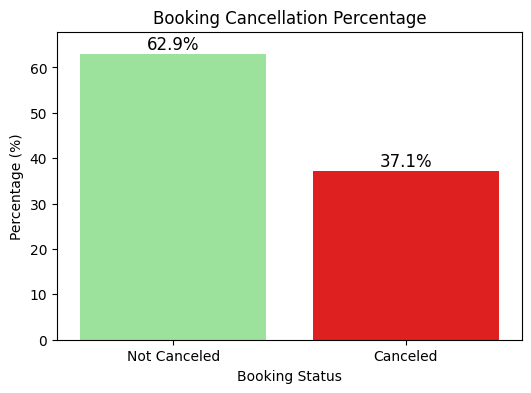

In [ ]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True) * 100
cancelled_perc.index = ['Not Canceled', 'Canceled']  # Rename index

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=cancelled_perc.index, y=cancelled_perc.values, palette=['lightgreen', 'red'])

plt.xlabel("Booking Status")
plt.ylabel("Percentage (%)")
plt.title("Booking Cancellation Percentage")

for i, v in enumerate(cancelled_perc.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.ylim(0, max(cancelled_perc.values) + 5)  # Adjust y-axis
plt.show()


<Figure size 800x500 with 0 Axes>

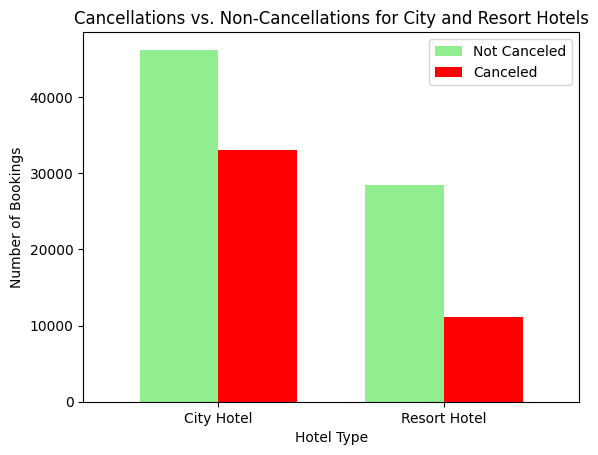

In [ ]:
cancellation_counts = df.groupby(["hotel", "is_canceled"]).size().unstack()

# Plot the bar chart
plt.figure(figsize=(8, 5))
cancellation_counts.plot(kind="bar", stacked=False, color=["lightgreen", "red"], width=0.7)

plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.title("Cancellations vs. Non-Cancellations for City and Resort Hotels")
plt.xticks(rotation=0)
plt.legend(["Not Canceled", "Canceled"], loc="upper right")

plt.show()

As we can see from here city hotel and more cancellation than resort hotel

In [ ]:
total_bookings = df["hotel"].value_counts()

cancellations = df[df["is_canceled"] == 1]["hotel"].value_counts()

cancellation_percentage = (cancellations / total_bookings) * 100

print(cancellation_percentage)

hotel
City Hotel      41.708175
Resort Hotel    27.975048
Name: count, dtype: float64


city hotel faces more cancellation

In [ ]:
city_hotel_df = df[df["hotel"] == "City Hotel"]

city_hotel_counts = city_hotel_df["is_canceled"].value_counts(normalize=True) * 100
print(city_hotel_counts)

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64


as we can see high cancelation rate in city hotel

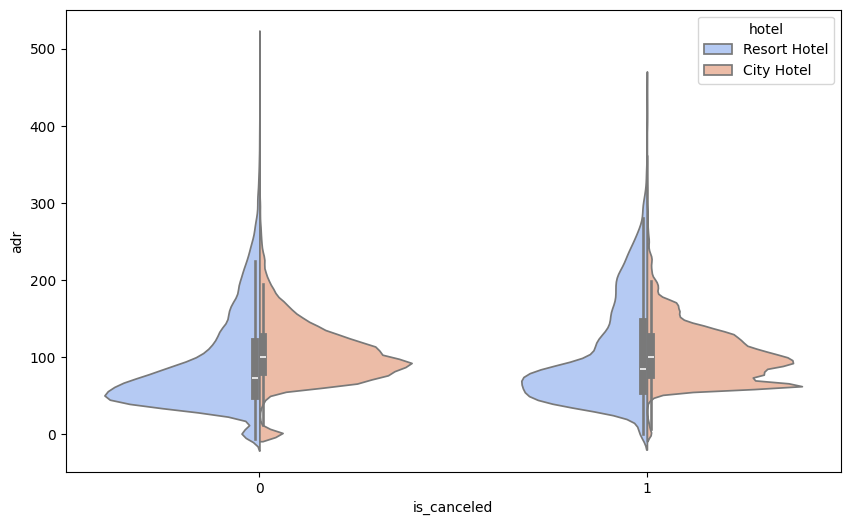

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="is_canceled", y="adr", hue="hotel", data=df, split=True, palette="coolwarm")
plt.show()


In [ ]:
grouped_adr = df.groupby(["hotel", "is_canceled"])["adr"].mean().reset_index()
print(grouped_adr)


          hotel  is_canceled         adr
0    City Hotel            0  105.746738
1    City Hotel            1  104.579019
2  Resort Hotel            0   91.237208
3  Resort Hotel            1  105.930112


In [ ]:
resort_hotel = df[df["hotel"] == "Resort Hotel"]
city_hotel = df[df["hotel"] == "City Hotel"]

# Group by reservation status date and calculate mean ADR
resort_hotel_grouped = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel_grouped = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

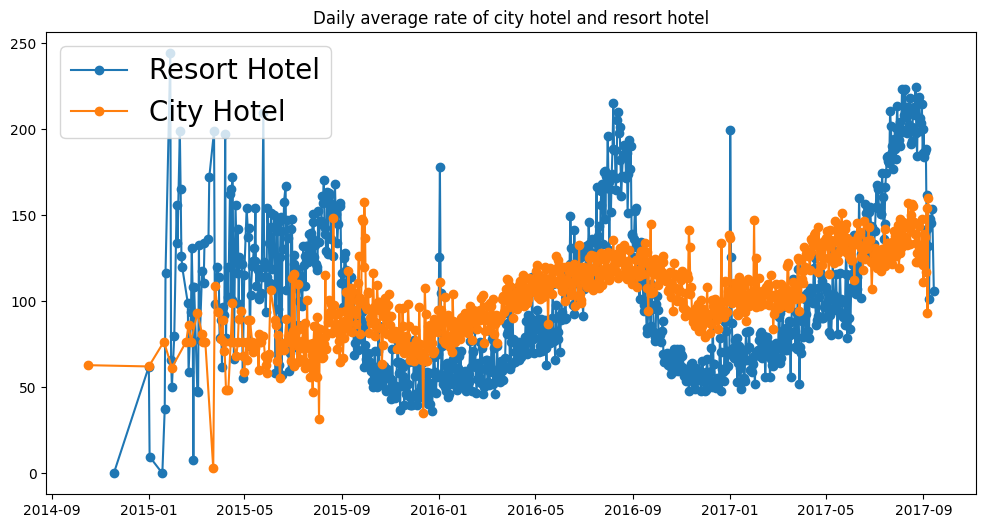

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Daily average rate of city hotel and resort hotel')
plt.plot(resort_hotel_grouped.index, resort_hotel_grouped["adr"], label="Resort Hotel", marker="o")
plt.plot(city_hotel_grouped.index, city_hotel_grouped["adr"], label="City Hotel", marker="o")
plt.legend(fontsize = 20)
plt.show()

From here we can see city hotel has less Daily average cost than Resort hotel. The Spikes are beacuses both City and resort prices are higher in weekends

# Cancellation and Non-cancellation per month

<Figure size 1200x600 with 0 Axes>

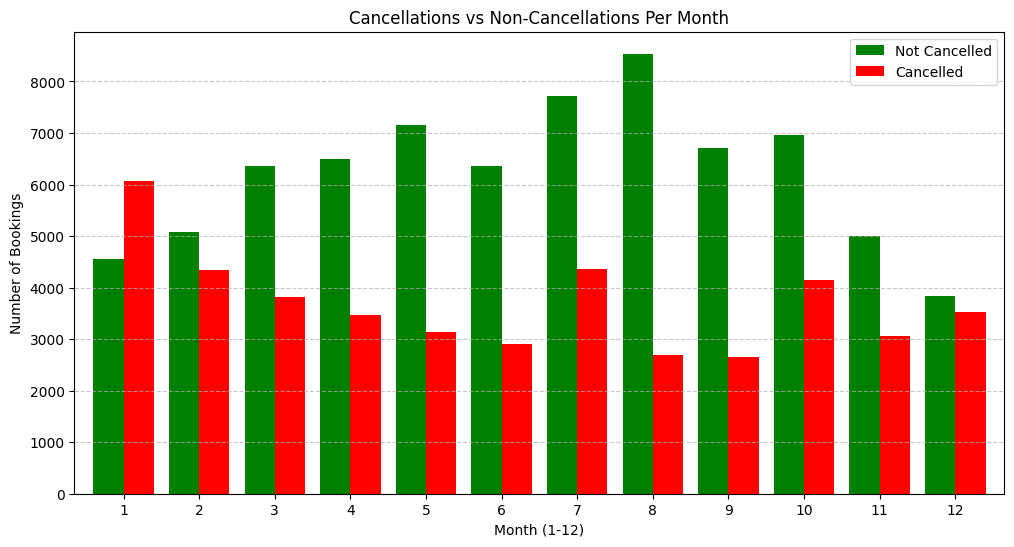

In [ ]:
# reservation_status_date is in datetime format
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

# month (numeric) from the reservation status date
df["month"] = df["reservation_status_date"].dt.month

# Grouped by month and cancellation status
monthly_cancellation = df.groupby(["month", "is_canceled"]).size().unstack(fill_value=0)

# Renamed columns for clarity
monthly_cancellation.columns = ["Not Cancelled", "Cancelled"]

# Ploted the grouped bar chart
plt.figure(figsize=(12, 6))
monthly_cancellation.plot(kind="bar", color=["green", "red"], width=0.8, figsize=(12,6))

plt.xlabel("Month (1-12)")
plt.ylabel("Number of Bookings")
plt.title("Cancellations vs Non-Cancellations Per Month")
plt.xticks(range(12), [str(i) for i in range(1, 13)], rotation=0)  # Ensure 1-12 labels
plt.legend(["Not Cancelled", "Cancelled"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Maximum cancallation happended in the month of January

<ipython-input-45-8b85ee12b562>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_canceled'] == 1]['adr'], label='Cancelled', color='red', shade=True)
<ipython-input-45-8b85ee12b562>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_canceled'] == 0]['adr'], label='Not Cancelled', color='green', shade=True)


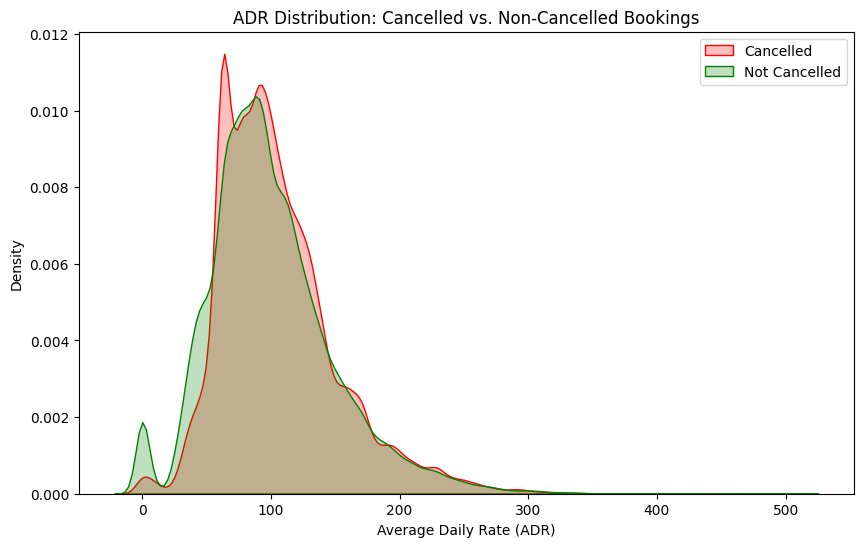

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['is_canceled'] == 1]['adr'], label='Cancelled', color='red', shade=True)
sns.kdeplot(df[df['is_canceled'] == 0]['adr'], label='Not Cancelled', color='green', shade=True)

plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Density')
plt.title('ADR Distribution: Cancelled vs. Non-Cancelled Bookings')
plt.legend()
plt.show()

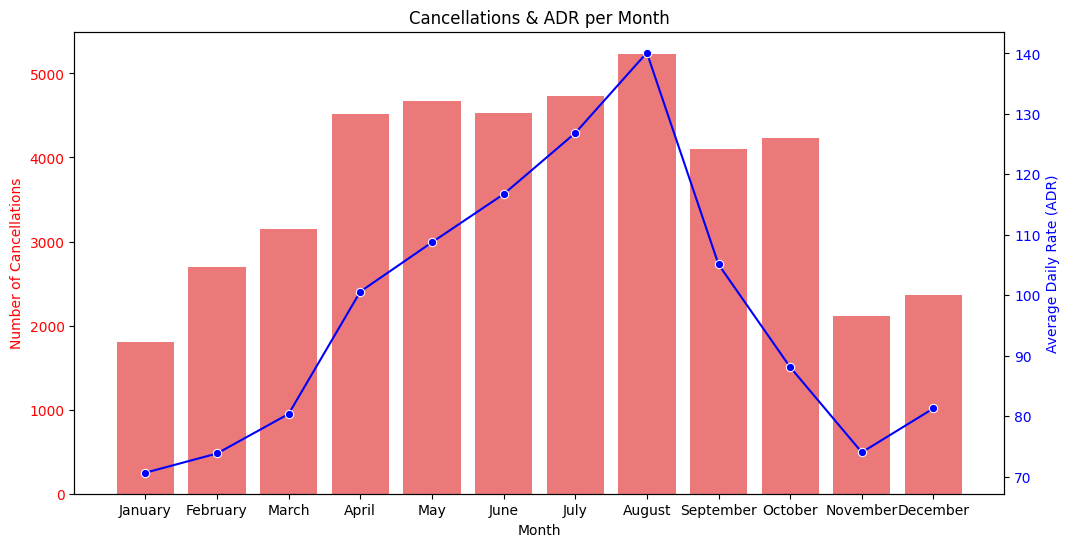

In [ ]:
monthly_data = df.groupby('arrival_date_month').agg(
    cancellations=('is_canceled', 'sum'),
    avg_adr=('adr', 'mean')
)

# Sorting months in order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(months_order)

# Creating figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Barplot for Cancellations
sns.barplot(x=monthly_data.index, y=monthly_data['cancellations'], color='red', alpha=0.6, ax=ax1)
ax1.set_ylabel("Number of Cancellations", color='red')
ax1.set_xlabel("Month")
ax1.tick_params(axis='y', labelcolor='red')

# Creating second axis for ADR
ax2 = ax1.twinx()
sns.lineplot(x=monthly_data.index, y=monthly_data['avg_adr'], color='blue', marker='o', ax=ax2)
ax2.set_ylabel("Average Daily Rate (ADR)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and display
plt.title("Cancellations & ADR per Month")
plt.xticks(rotation=45)
plt.show()

As we see can higher the price higher the cancellation rate

<ipython-input-48-bdf3770c5f28>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_canceled", y="lead_time", data=df, palette=["green", "red"])


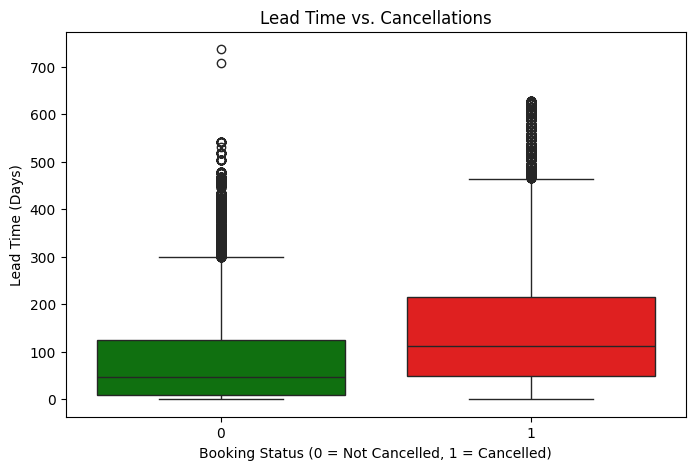

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="is_canceled", y="lead_time", data=df, palette=["green", "red"])
plt.xlabel("Booking Status (0 = Not Cancelled, 1 = Cancelled)")
plt.ylabel("Lead Time (Days)")
plt.title("Lead Time vs. Cancellations")
plt.show()


If lead time (days before check-in) is high, customers might cancel more often. Longer the waiting time more often they cancel

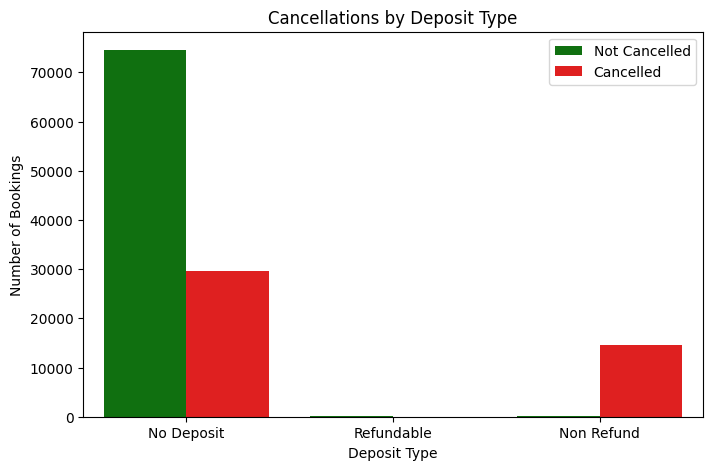

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="deposit_type", hue="is_canceled", data=df, palette=["green", "red"])
plt.xlabel("Deposit Type")
plt.ylabel("Number of Bookings")
plt.title("Cancellations by Deposit Type")
plt.legend(["Not Cancelled", "Cancelled"])
plt.show()


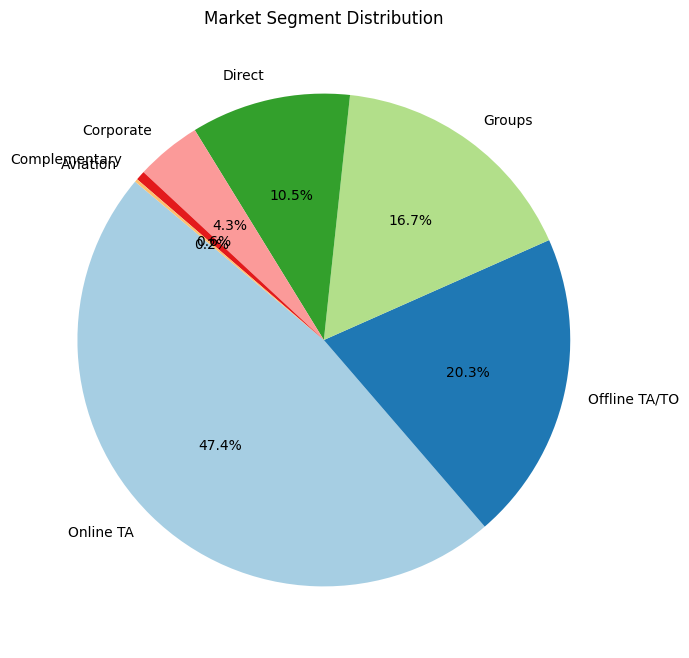

In [ ]:
market_segment_counts = df['market_segment'].value_counts()
market_segment_percentage = (market_segment_counts / market_segment_counts.sum()) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_segment_percentage, labels=market_segment_percentage.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Title
plt.title("Market Segment Distribution")

# Show the chart
plt.show()

Most the Customers are coming from Online TA

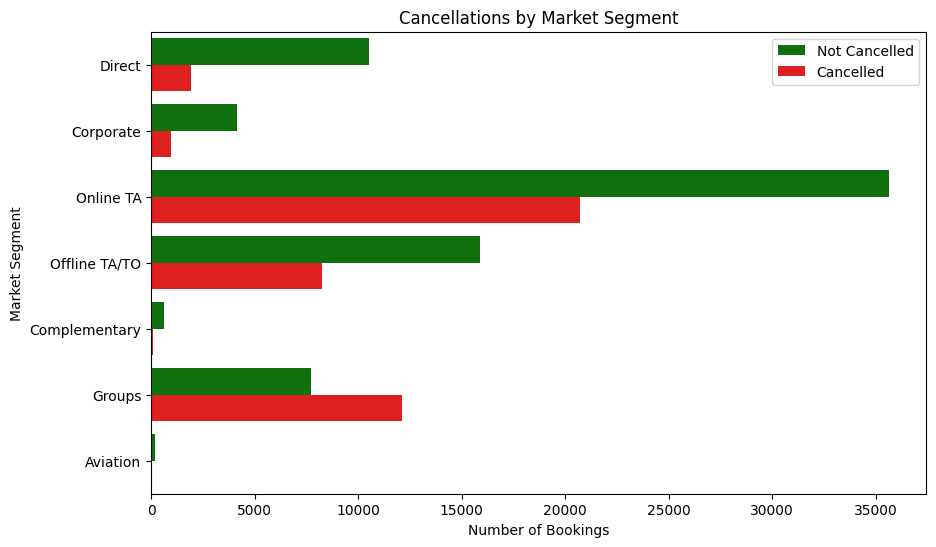

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y="market_segment", hue="is_canceled", data=df, palette=["green", "red"])
plt.xlabel("Number of Bookings")
plt.ylabel("Market Segment")
plt.title("Cancellations by Market Segment")
plt.legend(["Not Cancelled", "Cancelled"])
plt.show()


as we can more bookings are also happening from Online TA and More cancelation are also happening from online TA

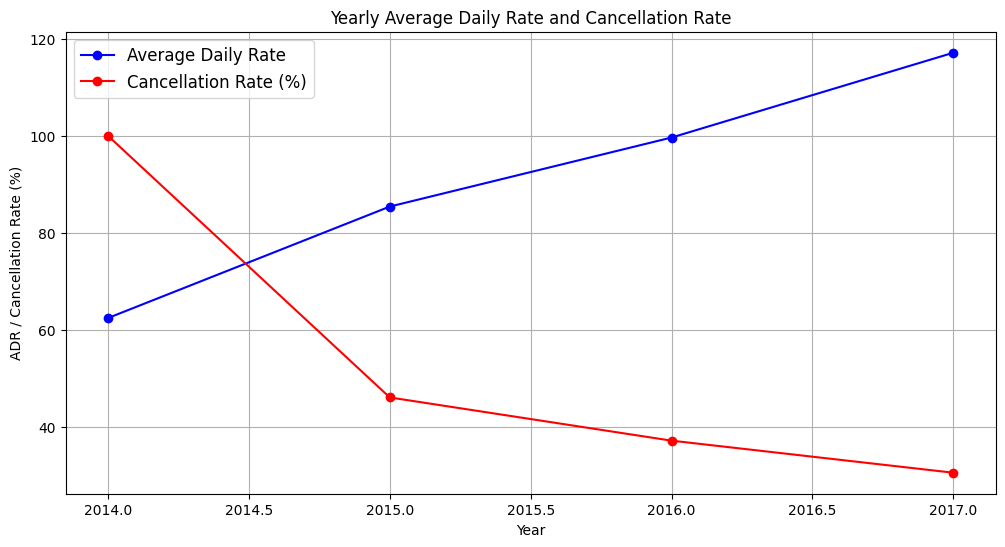

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Yearly Average Daily Rate and Cancellation Rate')

# Plot ADR (Average Daily Rate)
plt.plot(yearly_data["year"], yearly_data["adr"], label="Average Daily Rate", marker="o", color="blue")

# Plot Cancellation Rate
plt.plot(yearly_data["year"], yearly_data["is_canceled"], label="Cancellation Rate (%)", marker="o", color="red")

plt.xlabel("Year")
plt.ylabel("ADR / Cancellation Rate (%)")
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

Clearly we can see price factor is more important It is affecting the reservsation

<Axes: xlabel='customer_type', ylabel='count'>

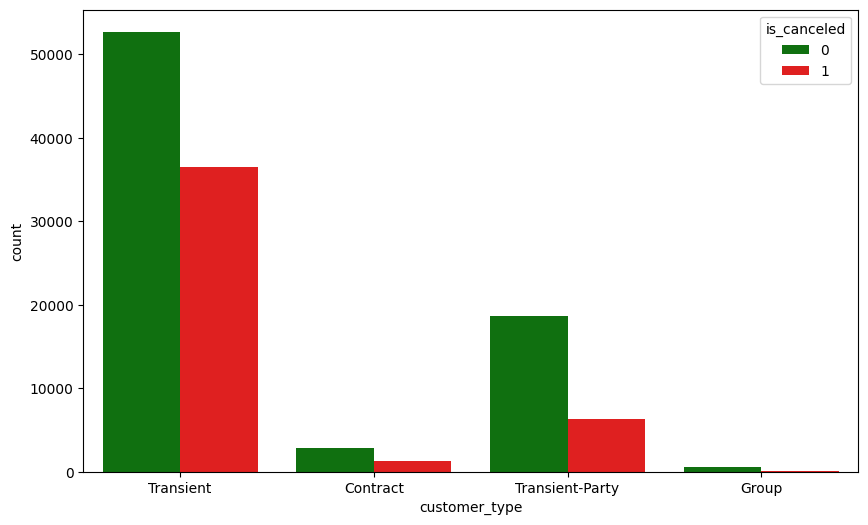

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="customer_type", hue="is_canceled", data=df, palette=["green", "red"])

#High Average Daily Rate (ADR) Leading to More Cancellations
# Online Travel Agents (OTA) and group bookings have higher cancellation rate
# More Cancellations in City Hotels than Resort Hotels
# If the lead time (days before check-in when the booking was made) is too long, there is a higher chance of cancellation.

# Suggestion
Optimize Pricing Strategy to Reduce Price-Sensitive Cancellations. Offer discounts for early bookings and price match guarantees to reduce cancellations.

Implement Flexible Yet Strategic Cancellation Policies. encourage non-refundable bookings by providing discounts for customers who commit early.

Identify High-Canceling Market Segments and Take Action: Analyze which customer segments (e.g., Online Travel Agents, group bookings) have high cancellation rates.